#Introduction to neural network with tensorflow

In this notebook we're going to learn how to write neural networks for classification.

A classification is  where youtry to classify as one thing or another.

A few types of classification problem:
* Binary clasiification
* Multiclass classificatiion
* Multilabel classification

##Creating data to view and fit

In [ ]:
import tensorflow as tf
from sklearn.datasets import make_circles
#Make 1000 examples
n_samples=1000
#Create circles
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [ ]:
#Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a liitle hard to understand let's visualize

In [ ]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


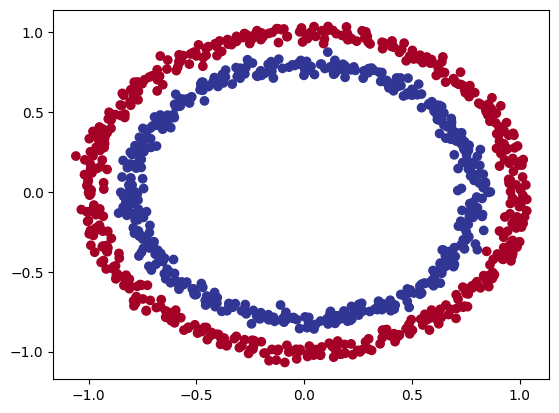

In [ ]:
#Visulaize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

##Input and output shapes


In [ ]:
#Check the shapes of our features
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
#How many samples we're working
len(X),len(y)

(1000, 1000)

In [ ]:
#View the first example of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

##Steps in modelling

The steps in modelling with TensorFlow are typically

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:
#Set the random seed
tf.random.set_seed(42)

#1.  Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
#3. Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.8910 - accuracy: 0.4810
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.8283 - accuracy: 0.4610
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 6.1439 - accuracy: 0.4750
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 6.2744 - accuracy: 0.5360
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 6.0342 - accuracy: 0.5780


In [ ]:
#Let's try and improve our model
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.2260 - accuracy: 0.4980


[7.226015090942383, 0.49799999594688416]

Since we're working on binary classification problemand our modelis getting around ~50% accuracy...it's performing as if it's guessing .

So let's step things up a notch and add an extra layer

In [ ]:
#Set the randoom seed
tf.random.set_seed(42)

#1. Create a model, this time with two layer
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2. Compile our model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [ ]:
#4. Evaluate our model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

##Improve our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might increase the hidden layers
2. Compile our model - here we might want to choose a different optimization function such as Adam instead of SGD
3. Fitting our model - perhaps we might fit our model for more epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

#1. Create the model (this time add 3 layer)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. Fit the model
model_3.fit(X,y,epochs=100,verbose=0)

In [ ]:
#4. Evaluate the  model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.5110


[0.699432373046875, 0.5109999775886536]

In [ ]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.4798648 ],
       [0.5694871 ],
       [0.5743176 ],
       [0.5776635 ],
       [0.4350085 ],
       [0.5820777 ],
       [0.5602841 ],
       [0.47401834],
       [0.47898418],
       [0.5794333 ],
       [0.5226667 ],
       [0.5263235 ],
       [0.56836605],
       [0.44894242],
       [0.4427573 ],
       [0.45830092],
       [0.5524435 ],
       [0.46178964],
       [0.5588709 ],
       [0.5111724 ],
       [0.50025684],
       [0.5973306 ],
       [0.45820412],
       [0.48343855],
       [0.59633327],
       [0.5833826 ],
       [0.5516331 ],
       [0.45344856],
       [0.453933  ],
       [0.44616848],
       [0.4817442 ],
       [0.58419305],
       [0.55778277],
       [0.45176452],
       [0.45838103],
       [0.60193574],
       [0.5815648 ],
       [0.52645105],
       [0.4548342 ],
       [0.5037846 ],
       [0.50673985],
       [0.54452544],
       [0.519436  ],
       [0.44798   ],
       [0.5324588 ],
       [0.5504267 ],
       [0.4420968 ],
       [0.543

To visualize our model's prediction, let's create a function 'plot_decision_boundary()', this function will
* Take in a trained model, features (X) and labels (y)
*  Create a meshgrid of the different X values
* Mkae predictions across the meshgrid
* Plot the predictions as wwell as a line between zones(where each unique class falls)

In [ ]:
from tensorflow.python.ops.array_ops import meshgrid
import numpy as np
def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model prediction on X.
  This function was inspired by two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2.made with ml multilayer preceptors
  """
  #Define the axis boundaries of the plot and create a meshgrid
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))
  #Create X values(we're going to make predictions on this)
  x_in=np.c_[xx.ravel(),yy.ravel()]#stack 2d arrays together
  #Make predictions
  y_pred=model.predict(x_in)
  #Check for multi-class
  if len(y_pred[0])>1:
    print("doing multi-class classification")
    #We have to reshape our prediction to get them ready for plotting
    y_pred=np.agrmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)

  #Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


313/313 [==============================] - 0s 1ms/step
doing binary classification


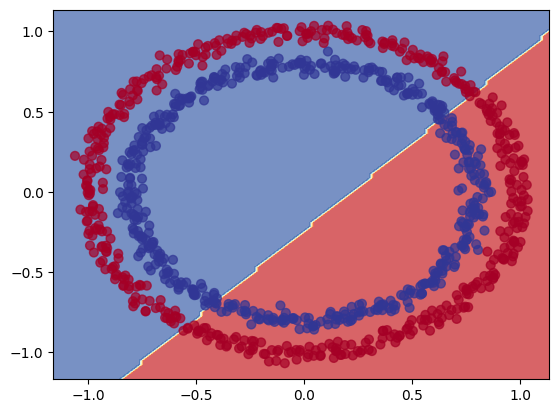

In [ ]:
#Check outh the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
 #Let's see if our model can be used for a regression problem..

 tf.random.set_seed(42)
 #Create some regression data
 X_r=tf.range(0,1000,5)
 y_r=tf.range(100,1100,5)#y=x+100

#Spilt our regression data into training  and test sets
X_r_train=X_r[:150]
X_r_test=X_r[150:]
y_r_train=y_r[:150]
y_r_test=y_r[150:]

#Fit our model to the regression data
model_3.fit(X_r_train,y_r_train,epochs=100)

Epoch 1/100


ValueError: ignored

We can compiled our model for binary classification problem.

But.. we're now working on a regression problem, let's change the model to suit our data.


In [ ]:
#Setup the random seed
tf.random.set_seed(42)

#1. Create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
#3. Fit the model
model_3.fit(tf.expand_dims(X_r_train,axis=1),y_r_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 285.5501 - mae: 285.5501
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 184.8392 - mae: 184.8392
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 86.5526 - mae: 86.5526
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 53.3120 - mae: 53.3120
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 73.1707 - mae: 73.1707
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 57.9156 - mae: 57.9156
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 42.4364 - mae: 42.4364
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 47.8979 - mae: 47.8979
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 41.6924 - mae: 41.6924
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 44.2058 - mae: 44.2058
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 5ms/step


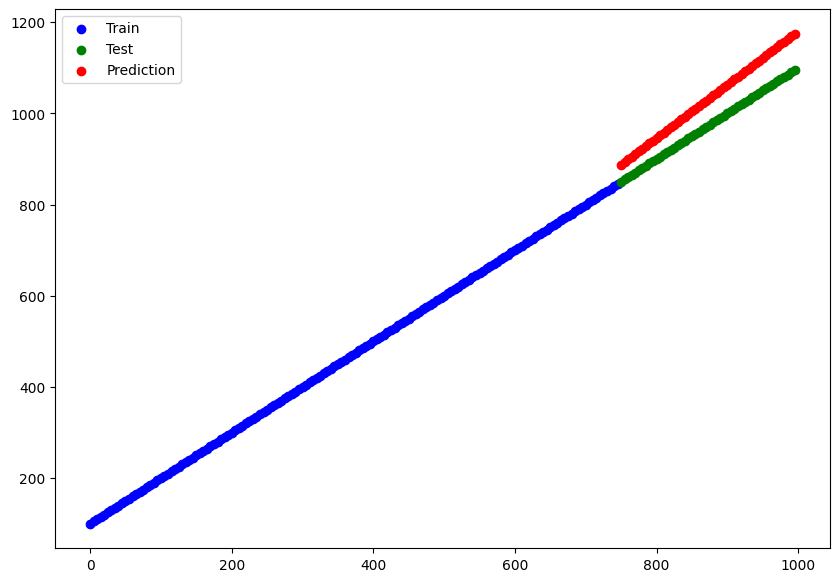

In [ ]:
#Make predictions with our trained model
y_r_pred=model_3.predict(X_r_test)

#Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_r_train,y_r_train,c="b",label="Train")
plt.scatter(X_r_test,y_r_test,c="g",label="Test")
plt.scatter(X_r_test,y_r_pred,c="r",label="Prediction")
plt.legend();

##The missing peice:Non-linearity

In [ ]:
X,y


(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
#Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

#2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

#3. Fit the model
history=model_4.fit(X,y,epochs=100,verbose=0)
history

In [ ]:
model_4.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 4.5467 - accuracy: 0.4780


[4.5466694831848145, 0.4779999852180481]

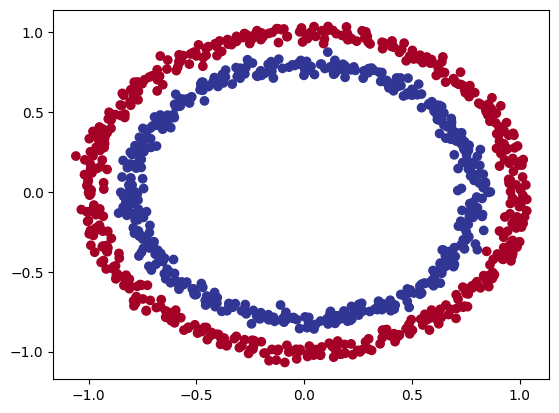

In [ ]:
#Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


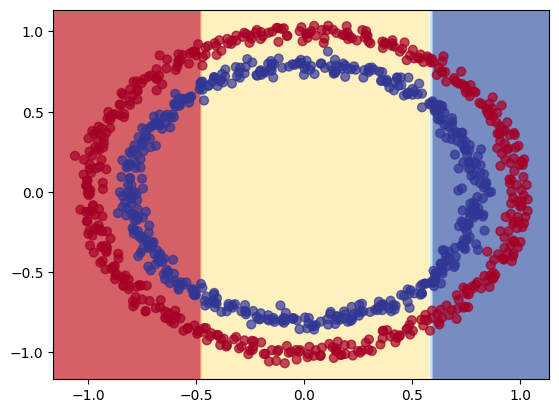

In [ ]:
#Check the decision boundary
plot_decision_boundary(model=model_4,
                      X=X,
                      y=y)

Let's try to build our first nueral network with a non-linear activation function.  

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1.Create the model
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

#2.Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

#3.Fit the model
model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.3818 - accuracy: 0.4790
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.2876 - accuracy: 0.4780
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1863 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.0712 - accuracy: 0.4790
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1274 - accuracy: 0.4780
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1717 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1717 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1716 - accuracy: 0.4780
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1714 - accuracy: 0.4780
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1712 - accuracy: 0.4780
Epoch 11/

In [ ]:
#Time to replicate the muli=layer neural network from TensorFlow playground

#Set the random seed
tf.random.set_seed(42)

#1.Create the model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

#3.Fit the model
model_6.fit(X,y,epochs=250,verbose=0)

In [ ]:
#Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9820


[0.052963148802518845, 0.9819999933242798]

313/313 [==============================] - 1s 1ms/step
doing binary classification


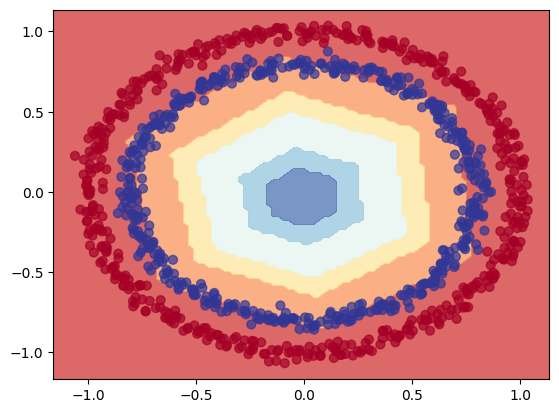

In [ ]:
#How do our predictions look?
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)


In [ ]:
#Set the random seed
tf.random.set_seed(42)

#1.Create the model
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#2.Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

#3.Fit the model
model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7380 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7214 - accuracy: 0.4940
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7129 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7073 - accuracy: 0.4700
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7047 - accuracy: 0.4270
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7027 - accuracy: 0.3930
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.4210
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.4590
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4640
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.4520
Epoch 11/

In [ ]:
#4.Evaluate the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5817 - accuracy: 0.7640


[0.5816732048988342, 0.7639999985694885]

313/313 [==============================] - 0s 1ms/step
doing binary classification


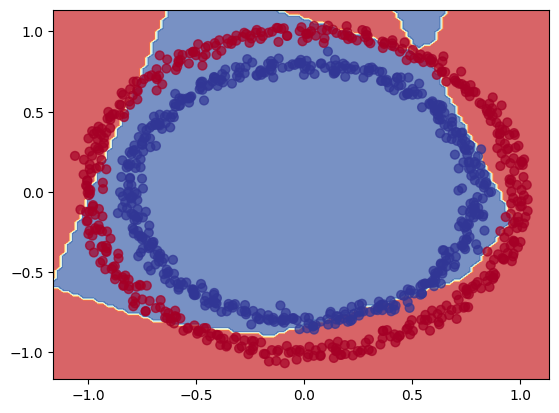

In [ ]:
#Let's visualize the etrics
plot_decision_boundary(model_7,X,y)

In [ ]:
#Create a toy a tensor(similar to the data we passed into our models)
A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

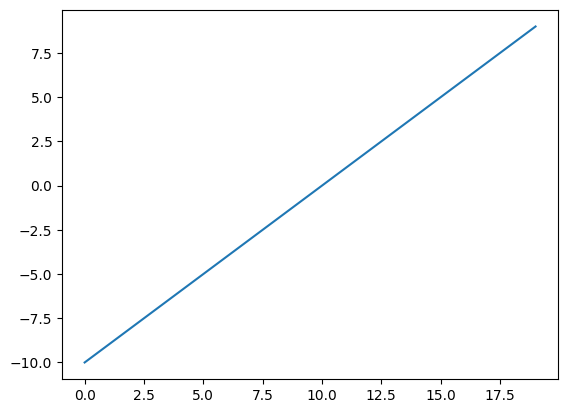

In [ ]:
#Visualize out the toy tensor
plt.plot(A)

In [ ]:
#let's start bt replicating sigmoid-sigmoid(X)=1/(1+exp(-X))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

#Use the sigmoid function on our toy fuction
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

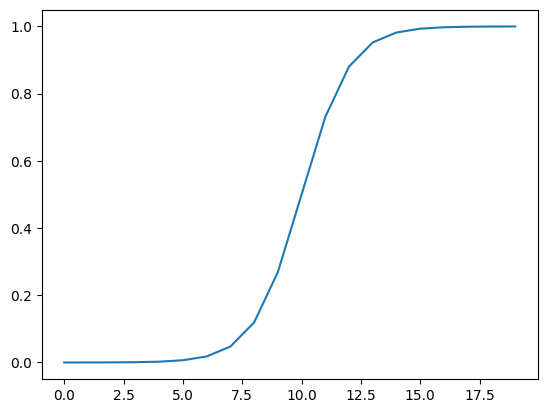

In [ ]:
#Plot the toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
#Let's recreate the relu function
def relu(x):
  return tf.maximum(0,x)

#Pas the toy tensor to relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

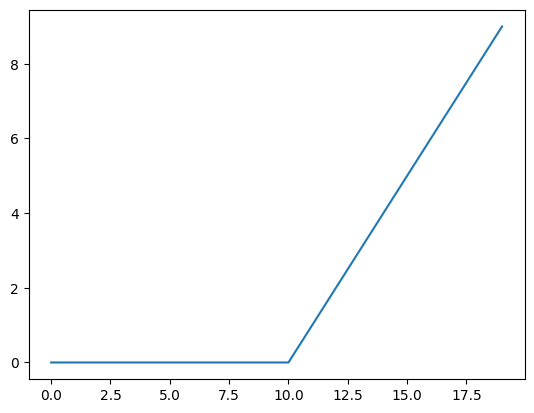

In [ ]:
#Plot relu modified tensor
plt.plot(relu(A))

In [ ]:
#Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

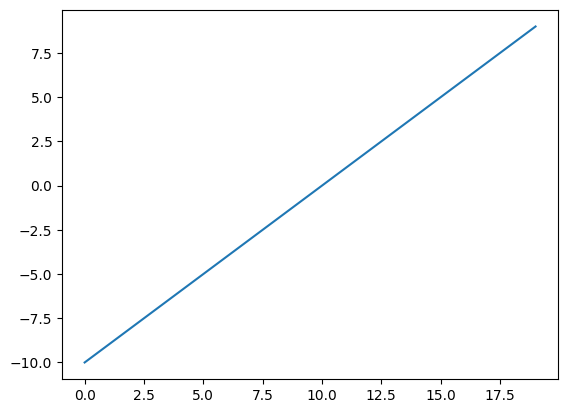

In [ ]:
#Does the linear activation function change anything
plt.plot(tf.keras.activations.linear(A))

In [ ]:
#Does A even change?
A==tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

##Evaluating and improving our classfication

So far we have been training and testing on same dataset.

However, in machine learning this is basiscally a sin

So let's create a training and test set

In [ ]:
#Check how many examples we have
len(X)

1000

In [ ]:
#Split into train and test sets
X_train,y_train=X[:800],y[:800]
X_test,y_test=X[800:],y[800:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
#Let's recreate a model to fit on training data and  evaulate on testing data

#Set random seed
tf.random.set_seed(42)

#1.Create the model
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#2.Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

#3.Fit the model
history=model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.5025
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5337
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5337
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.5612
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.6325
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.6913
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.8050
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.8050
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5042 - accuracy: 0.8687
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4513 - accuracy: 0.9250
Epoch 11/25
25/25 [

In [ ]:
#4.Evaluate the model
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.0815 - accuracy: 0.9850


[0.08151879161596298, 0.9850000143051147]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


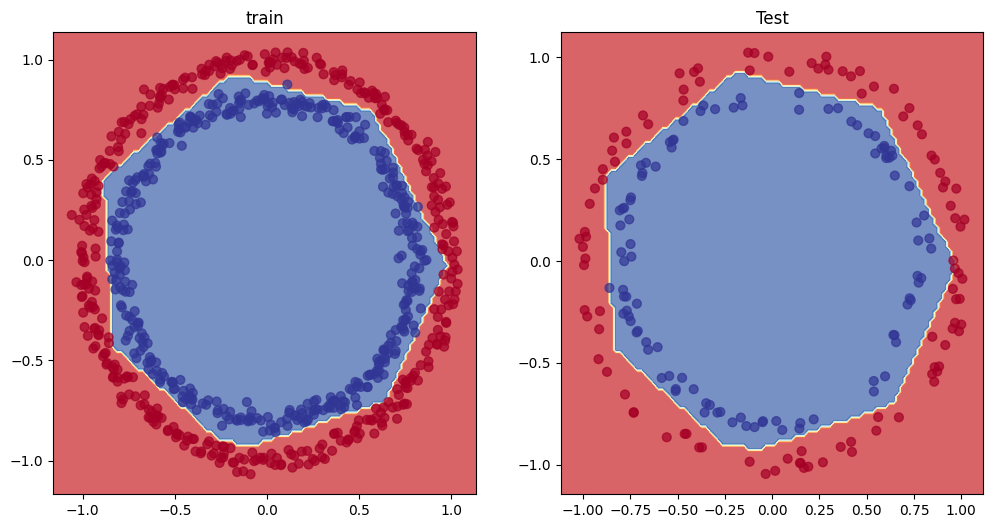

In [ ]:
#Plot the ddecision boundaries of training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)


##Plot the loss (or training) curves

In [ ]:
#Convert the history object into a Dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.690302,0.50250
1,0.684334,0.53375
2,0.678493,0.53375
3,0.669320,0.56125
4,0.652117,0.63250
5,0.626378,0.69125
6,0.590519,0.80500
7,0.553660,0.80500
8,0.504216,0.86875
9,0.451279,0.92500


Text(0.5, 1.0, 'Model_8 loss curves')

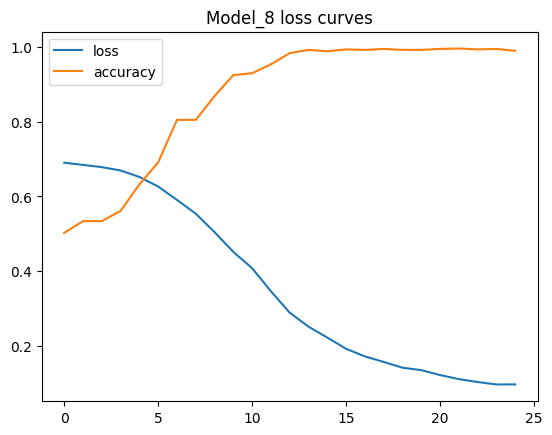

In [ ]:
#Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**Note**:For many problems, the loss function going down means the model is improving(the predictions its making are getting closer to the groung truth labels)

##Finding the best learning rate

To find the ideal learning rate(the learning rate where the loss decreases the most during training) we are going to use the following steps:
* A leaning rate **callback** - you can think of callback as an extra peice of functionality you can to your model while training.
* Another model(we could use the same one)
* Modified loss curve plot.

In [ ]:
#Set random seed
tf.random.set_seed(42)
#Create the model
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
#Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#Create a leraning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

#Fit the model
history=model_9.fit(X_train,
                    y_train,
                    epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6981 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5038 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5038 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5038 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5063 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5025 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

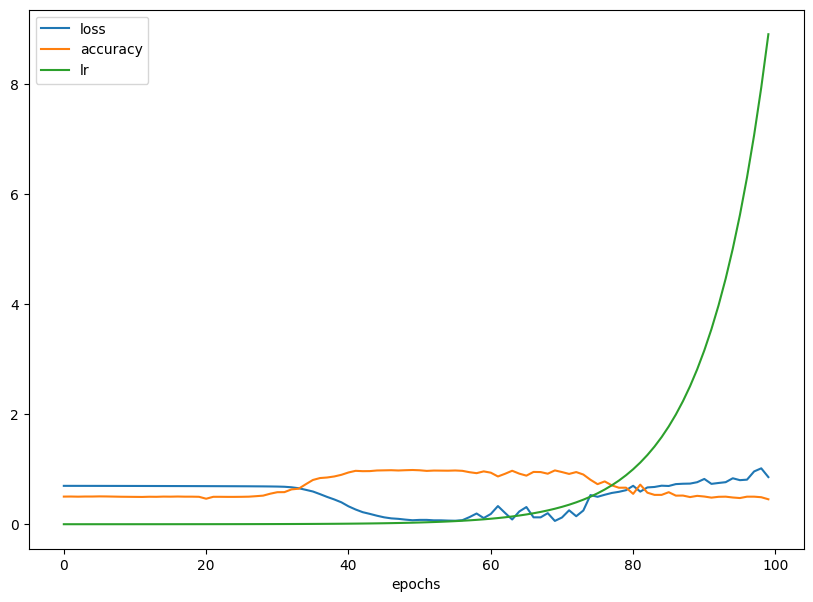

In [ ]:
#Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'learning rate vs loss')

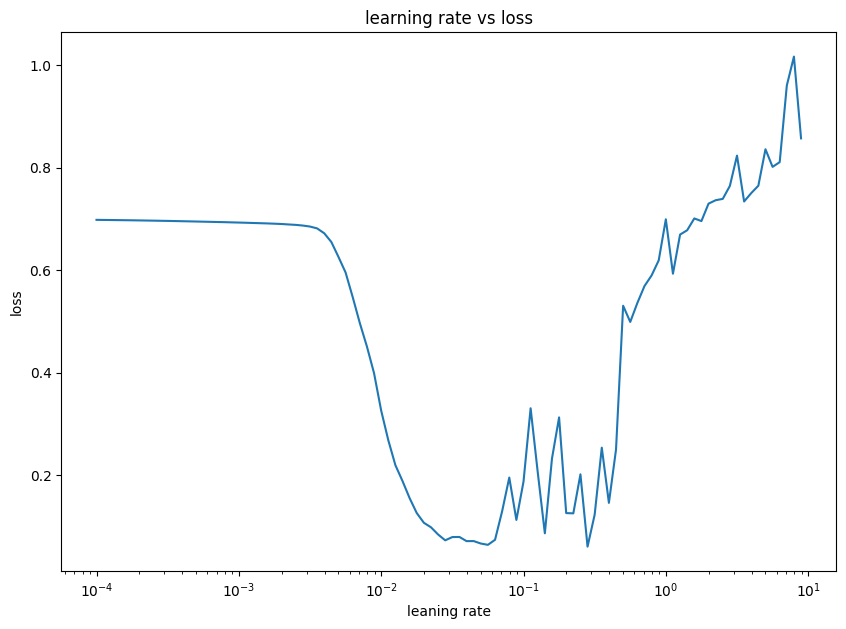

In [ ]:
#Plot the learning rate versus the loss
lrs=1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("leaning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")

In [ ]:
  #Exmaple of other learning rate values
  10**0,10**-1,10**-2,10**-3,1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
#Let's try using a higher *ideal* learning rate with the same model as before

#Set random seed
tf.random.set_seed(42)

#Create the model
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile the model with ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

#Fit the model with 20 epochs(5 leass than before)
history=model_10.fit(X_train,y_train,epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.5113
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5163
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5263
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5400
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.5813
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.6175
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.6525
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.7038
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.7437
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.8275
Epoch 11/20
25/25 [

In [ ]:
#Evaluate model 10 on the test dataset
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1390 - accuracy: 0.9600


[0.13901986181735992, 0.9599999785423279]

In [ ]:
#Evaluate model 8 on test dataset
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0815 - accuracy: 0.9850


[0.08151879161596298, 0.9850000143051147]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


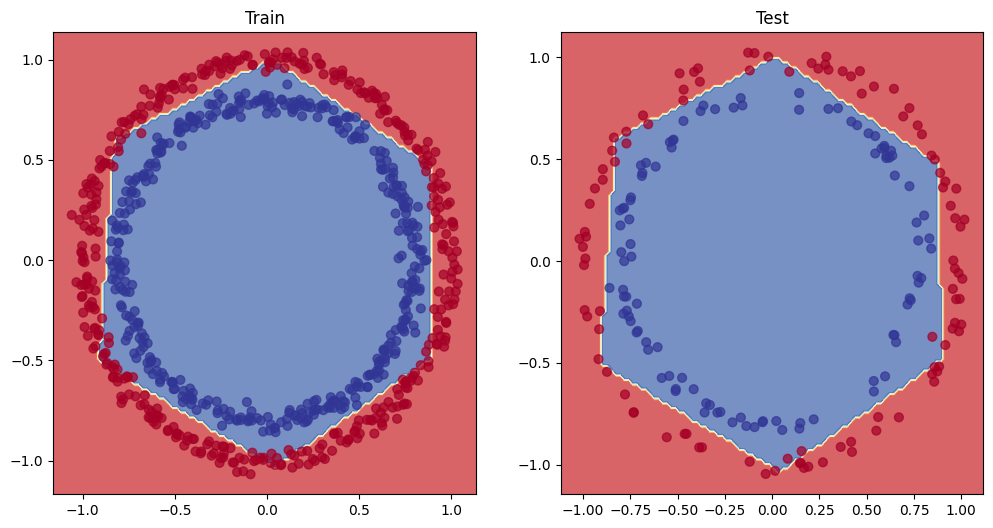

In [ ]:
#Plot the decision boundaries fot the  training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show()

##More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods 7
 metrics you should be fimilar with:
 * Accuracy
 * Precision
 * Recall
 * F1-score
 * Confusion matrix
 * Clssification report(from sci-kit learn)

In [ ]:
#Check the memory of our model
loss,accuracy=model_10.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set:{(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.1390 - accuracy: 0.9600
Model loss on the test set: 0.13901986181735992
Model accuracy on the test set:96.00%


How about confusion matrix?

In [ ]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#Make predictions
y_preds=model_10.predict(X_test)

#Create confusion matrix
confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_preds[:10]

array([[0.9839514 ],
       [0.99879175],
       [0.9150724 ],
       [0.9900086 ],
       [0.0443264 ],
       [0.01805271],
       [0.98711556],
       [0.0161176 ],
       [0.98937196],
       [0.46212813]], dtype=float32)

Oops...Loks like our predictions array has come out in **prediction probability** form...the standard output from the sigmoid(or softmax) activation functions.

In [ ]:
#Convert predictions probability inot binary format and view the first ten
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
#Create a confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[93,  8],
       [ 0, 99]])

How about we prettify our confusion matrix

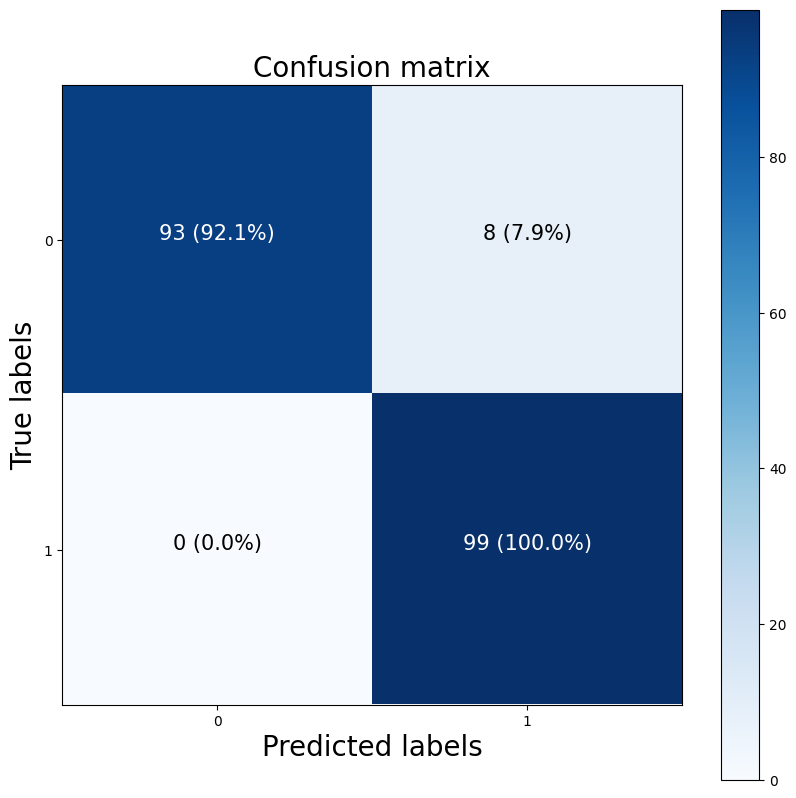

In [ ]:
#Note:the confusion matrix code we r about to write is a remix of scikit-learn's (plot_confusion_matrix)

import itertools

figsize=(10,10)
#Create the confusion matrix
cm=confusion_matrix(y_test,tf.round(y_preds))
cm_norms=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]#normalise our confusion matrix
n_classes=cm.shape[0]

#Let's prettify it
fig,ax=plt.subplots(figsize=figsize)
#Create a matrix plot
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes=False
if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

#Labels the axes
ax.set(title="Confusion matrix",
       xlabel="Predicted labels",
       ylabel="True labels",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

#Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust the labels
ax.yaxis.label.set_size(20),
ax.xaxis.label.set_size(20),
ax.title.set_size(20)

#Set threshold for diffrernt colors
threshold=(cm.max()+cm.min())/2.

#Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norms[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

##Working with a larger example(mutliclass classification)

When you have more than two classes as an option, it's known as **multi-class classification.**
* This means if you have three different classses its multi-class classification
* It also means if you have 100 different class, its multi-class classification.

To practice mulyi-class classification, we're going to build a neural network to classify images of different items of clothing.




In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

In [ ]:
#Show the first training sample
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
#Check the shape of a single example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

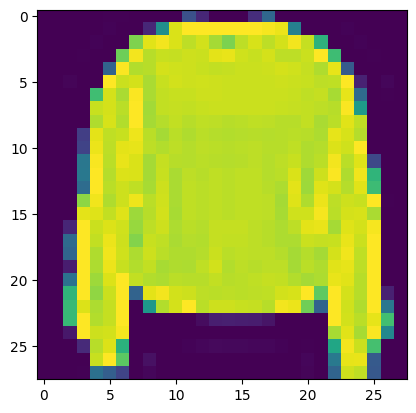

In [ ]:
#Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
#Check our samples labels
train_labels[7]

2

In [ ]:
#Create a small list so we can index onto our training labels so they're human-readable
class_names=["T-shirts/top","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Dress')

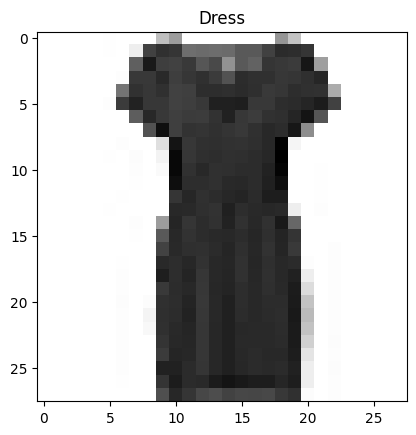

In [ ]:
#Plot an example image and its label
ioc=20
plt.imshow(train_data[ioc],cmap=plt.cm.binary)
plt.title(class_names[train_labels[ioc]])

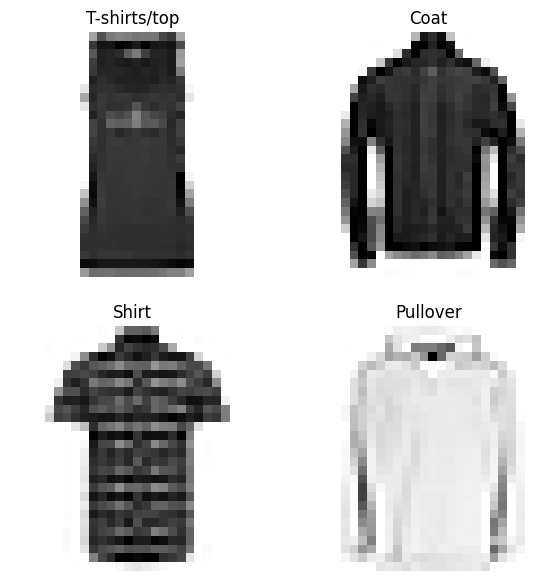

In [ ]:
#Plot multiple random images of fashion mnist
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

##Building a multi-class classification model

For our mutli-class classification model we can similar architeture to our binary classifiers, however, we're going to tweak a few things:
* Input shape=28x28 (the shape of one image)
* Output shape=10(pne per peice of clothing)
* Loss function=tf.keras.losses.CategorialCrossentropy
   * If your labels are one hot encoded, use CategorialCrossentropy
   * If your labels are integer use SparseCategorialCrossentropy
* Output layer activation=Softmax(not sigmoid)

Our data needs to be flattened out (from 28x28 to None,784)

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1.Create the model
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
#2.Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer="Adam",
                 metrics=["accuracy"])
#3.Fit the model
non_norm_history=model_11.fit(train_data,
                              tf.one_hot(train_labels,depth=10),
                              epochs=10,
                              validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 1.9513 - accuracy: 0.2305 - val_loss: 1.7263 - val_accuracy: 0.2775
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.6849 - accuracy: 0.2754 - val_loss: 1.6526 - val_accuracy: 0.2619
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.6386 - accuracy: 0.2811 - val_loss: 1.6258 - val_accuracy: 0.2674
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6169 - accuracy: 0.2810 - val_loss: 1.6169 - val_accuracy: 0.2793
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6036 - accuracy: 0.2856 - val_loss: 1.6016 - val_accuracy: 0.2932
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5952 - accuracy: 0.2917 - val_loss: 1.5924 - val_accuracy: 0.2920
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.5879 - accuracy: 0.3065 - val_loss: 1.5853 - val_accur

In [ ]:
#Check the model summary
model_11.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Check the min and max values of the training data
train_data.min(),train_data.max()

(0, 255)

Neural network prefers data to be scaled  (or noramlized), this means they like to have numbers in the numbers they like to have between 0 and 1.



In [ ]:
#We can get our training and testing data between 0&1 by dividing by max
train_data_n=train_data/255.0
test_data_n=test_data/255.0

#Check the min and max values of the scaled training data
train_data_n.min(),train_data_n.max()

(0.0, 1.0)

In [ ]:
#Now our data is normalised, let's build  a model to find a pateern in it
#Set random seed
tf.random.set_seed(42)

#1.Create the model
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
#2.Compile the model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer="Adam",
                 metrics=["accuracy"])
#3.Fit the model
non_norm_history=model_12.fit(train_data_n,
                              tf.one_hot(train_labels,depth=10),
                              epochs=10,
                              validation_data=(test_data_n,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.2959 - accuracy: 0.4740 - val_loss: 0.9506 - val_accuracy: 0.5964
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8057 - accuracy: 0.6970 - val_loss: 0.7210 - val_accuracy: 0.7402
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6676 - accuracy: 0.7503 - val_loss: 0.6795 - val_accuracy: 0.7431
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6446 - accuracy: 0.7572 - val_loss: 0.6684 - val_accuracy: 0.7524
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6346 - accuracy: 0.7592 - val_loss: 0.6588 - val_accuracy: 0.7576
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6246 - accuracy: 0.7642 - val_loss: 0.6647 - val_accuracy: 0.7504
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6203 - accuracy: 0.7643 - val_loss: 0.6507 - val_accuracy

**Note:**Neural network tend to prefer data in numerical form as well as scaled/normalised (numberss between 0&1)

NameError: ignored

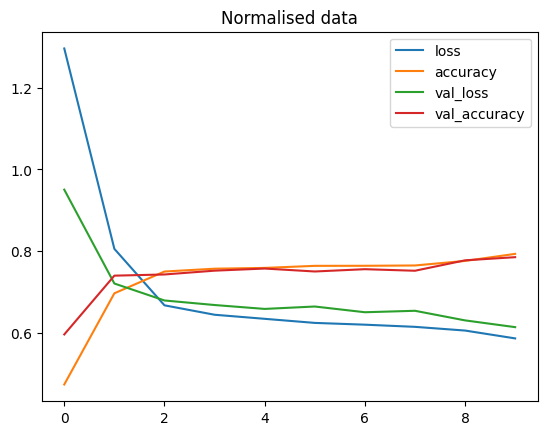

In [ ]:
import pandas as pd
#Plot non-normalised data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Normalised data")
#Plot normalised data loss curves
pd.DataFrame(norm_hisory.history).plot(title="Normalised data")

**Note** the same model with even slightly different data can produce *dramtically* different ressults. So when you're comparing models, it's important to make sure you're comapring them on the same criteria(eg. same architecture but differnt architecture)

##Finding ideal learning rate

In [ ]:
#Set random seed
tf.random.set_seed(42)
#1.Create the model
model_13=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
#2.Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer="Adam",
                 metrics=["accuracy"])
#Create the learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))
#3.Fit the model
find_lr_history=model_13.fit(train_data_n,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data_n,test_labels),
                             callbacks=[lr_scheduler])

In [ ]:
#Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs=1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("finding ideal learning rate")

In [ ]:
#Let's refit a model with ideal learning rate

#Set random seed
tf.random.set_seed(42)

#Create model
model_14=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
#Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])
#Fit the model
history_14=model_14.fit(train_data_n,
                        train_labels,
                        epochs=20,
                        validation_data=(train_data,train_labels))

##Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other clssification matrix (such as a confusion matrix)
* Asses some of its predictions (through visualization)
* Improve its results(by training for longer or changing the architecture)
* Sve and export it to use in an appllication

Let's go through top 2....

In [ ]:
#Note:the confusion matrix code we r about to write is a remix of scikit-learn's (plot_confusion_matrix)

import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):
  #Create the confusion matrix
  cm=confusion_matrix(y_true,y_pred)
  cm_norms=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]#normalise our confusion matrix
  n_classes=cm.shape[0]

  #Let's prettify it
  fig,ax=plt.subplots(figsize=figsize)
  #Create a matrix plot
  cax=ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Set labels to be classes
  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  #Labels the axes
  ax.set(title="Confusion matrix",
        xlabel="Predicted labels",
        ylabel="True labels",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust the labels
  ax.yaxis.label.set_size(text_size),
  ax.xaxis.label.set_size(text_size),
  ax.title.set_size(text_size)

  #Set threshold for diffrernt colors
  threshold=(cm.max()+cm.min())/2.

  #Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norms[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
class_names

['T-shirts/top',
 'Trousers',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#Make some predictions with our model
y_probs=model_14.predict(test_data_n)#probs is short for prediction probabilitiess

#View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.1156681e-05, 6.2650580e-16, 1.2011764e-10, 7.0090809e-09,
        2.1298409e-11, 1.8718776e-01, 1.4526672e-06, 1.6150485e-01,
        5.3291794e-02, 5.9800309e-01],
       [7.5151238e-06, 1.2786979e-19, 9.5440912e-01, 3.9526773e-07,
        3.0090945e-02, 5.8017318e-26, 1.5487452e-02, 1.7996860e-27,
        4.6049213e-06, 5.9422739e-22],
       [2.2970601e-03, 9.8835474e-01, 4.4050794e-05, 6.8711257e-03,
        3.7214675e-05, 1.3849927e-03, 4.8198589e-04, 5.0131936e-04,
        2.0424795e-05, 7.1155214e-06],
       [2.2970601e-03, 9.8835474e-01, 4.4050794e-05, 6.8711257e-03,
        3.7214675e-05, 1.3849927e-03, 4.8198589e-04, 5.0131936e-04,
        2.0424795e-05, 7.1155214e-06],
       [2.3306672e-01, 9.5915238e-06, 3.5079235e-01, 1.7452186e-02,
        2.2859367e-02, 2.4419121e-08, 3.7179562e-01, 5.1612394e-09,
        4.0238723e-03, 1.5905722e-07]], dtype=float32)

**Note:**Remember to make predictions on same kind of data your model was trained on(eg if your model was trained on normalized data, you'll want to make predictions on normalised data)

In [ ]:
y_probs[0],tf.argmax(y_probs[0])

(array([1.1156681e-05, 6.2650580e-16, 1.2011764e-10, 7.0090809e-09,
        2.1298409e-11, 1.8718776e-01, 1.4526672e-06, 1.6150485e-01,
        5.3291794e-02, 5.9800309e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [ ]:
#Convert all of prediction probablities into integers
y_preds=y_probs.argmax(axis=1)

#View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[823,  10,  18,  45,   3,   1,  90,   0,  10,   0],
       [ 12, 950,   2,  28,   4,   0,   4,   0,   0,   0],
       [ 34,   0, 635,  10, 180,   0, 137,   0,   4,   0],
       [ 44,  25,  17, 795,  62,   0,  54,   0,   3,   0],
       [  2,   0, 104,  24, 763,   0, 103,   0,   4,   0],
       [  3,   0,   0,   2,   0, 907,   0,  40,  19,  29],
       [209,   5, 144,  40, 113,   0, 482,   0,   7,   0],
       [  0,   0,   0,   0,   0,  38,   0, 928,   5,  29],
       [  7,   1,   8,   8,   5,   3,  66,   2, 899,   1],
       [  3,   0,   0,   0,   0,  21,   0,  49,   5, 922]])

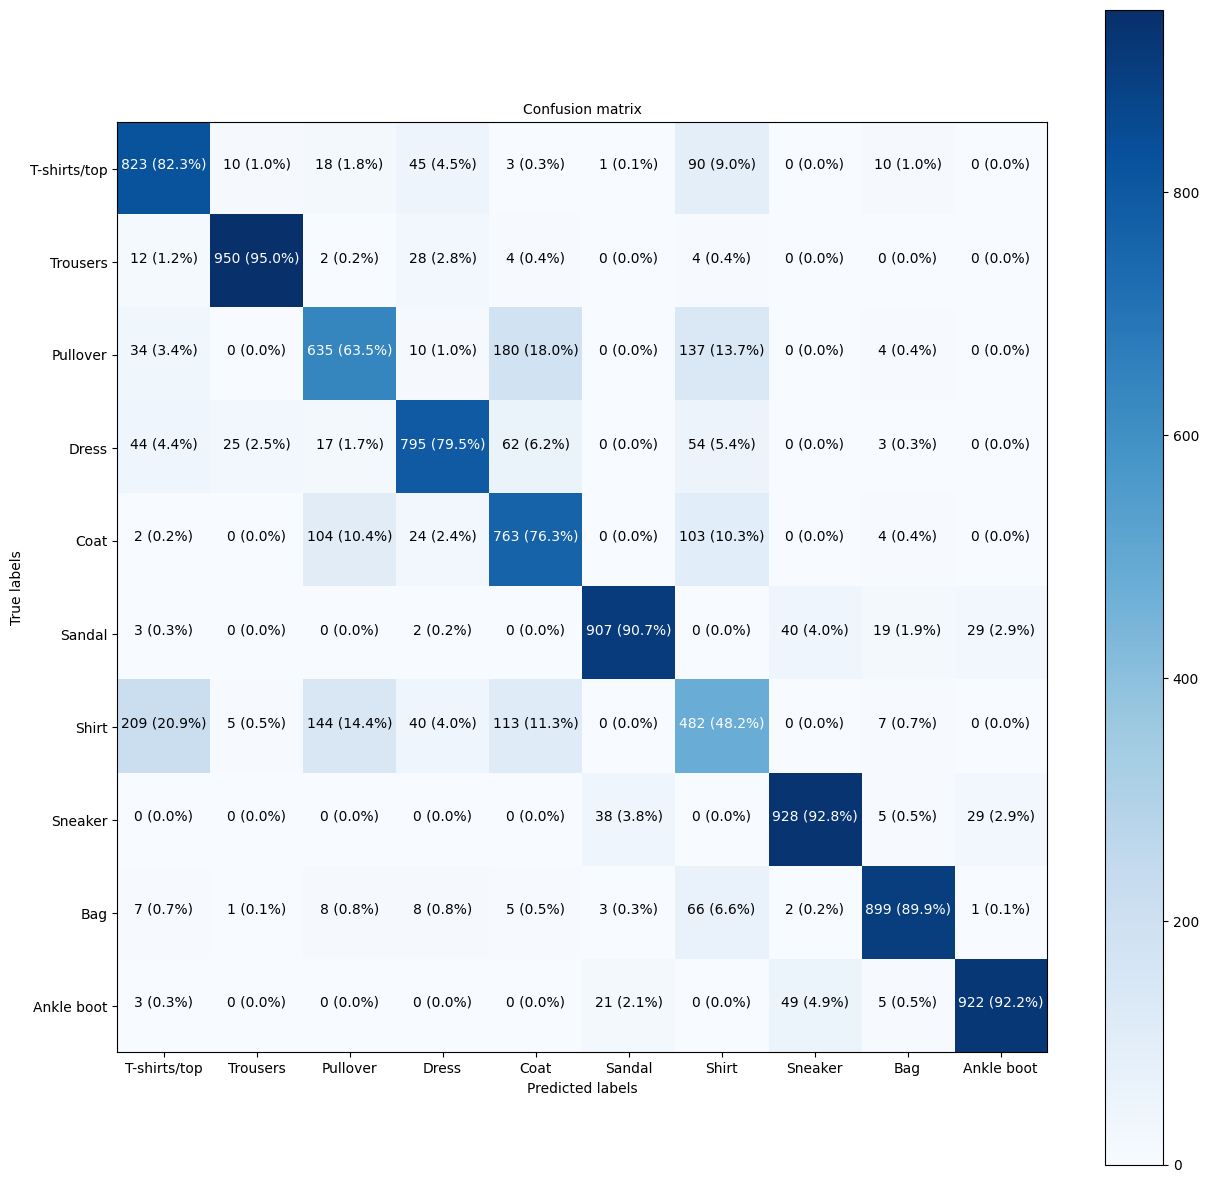

In [ ]:
#Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

**Note**:Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a better understanding of data and imputs & outputs of the model.

How about we create a fun little function for:
* Plot a random image
* Make prediction on said image
* Label the pot with the truth label and predicted label


In [ ]:
import random

def plot_random_image(model,images,true_labels,classes):
  """
  Picks a random image, plots it and labels with a prediction and truth label
  """
  #Set up random integer
  i=random.randint(0,len(images))

  #Create predictions and targets
  target_images=images[i]
  pred_probs=model.predict(target_images.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  #Plot the image
  plt.imshow(target_images,cmap=plt.cm.binary)

  #Change the color of the titles depending on if the prediction is right or wrong
  if pred_label==true_label:
    color="green"
  else:
    color="red"

  #Add xlabel information(prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}%(True:{})".format(pred_label,
                                                 100*tf.reduce_max(pred_probs),
                                                 true_label),
             color=color)#Set the color green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 21ms/step


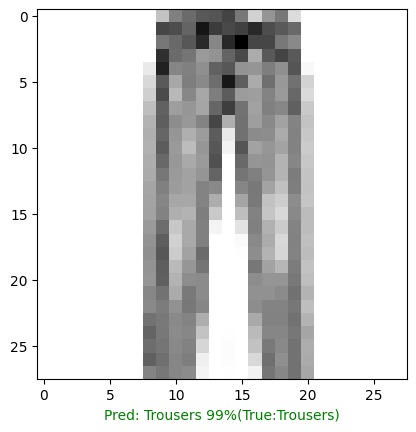

In [ ]:
#Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_n,#always make predictions on same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

##What pattern is our model learning?

In [ ]:
#Find the layers of our most recent model
model_14.layers

In [ ]:
#Extract a particualr layer
model_14.layers[1]

In [ ]:
#Get the patterns of a layer in our network
weights,biases=model_14.layers[1].get_weights()

#Shapes
weights,weights.shape

(array([[-0.5290363 ,  0.00323534, -0.41627666,  0.7626532 ],
        [-0.47191396,  0.42312732, -0.1324218 , -0.5229695 ],
        [-1.1383188 ,  0.25237608,  0.8153556 , -0.36880848],
        ...,
        [ 0.18300468, -0.29266337, -0.17081818,  0.12138574],
        [ 0.4671941 ,  0.21683836, -0.8095136 , -0.0108685 ],
        [-0.1266415 ,  0.17706561, -0.26996037,  0.09394292]],
       dtype=float32),
 (784, 4))

In [ ]:
model_14.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out the bias vector

In [ ]:
#Bias  and biases shapes
biases,biases.shape

(array([1.684818  , 0.00202771, 1.6091188 , 1.7981646 ], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paried with a weight matrix.

The bias vector also gets initailized as zeroes (atleast in cas e of a TensorFlow Dense layer).

The bias vector dictated how much the patterns within the corresponding weights matrix should influence the next layer

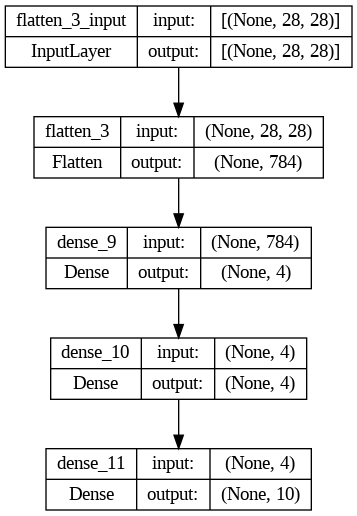

In [ ]:
#Let's check out another way of visiting our deep learning model
from tensorflow.keras.utils import plot_model
#See the inputs and outputs of each layer
plot_model(model_14,show_shapes=True)
